**BANK CUSTOMER CHURN PREDICTION USING MACHINE LEARNING**

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

**Display top 5 rows of the dataset**

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In the 'Exited column', 1 means customer left the bank and 0 means customer did not leave the bank.

Display last 5 rows of the dataset

In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Data shape

In [6]:
data.shape

(10000, 14)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 10000
Number of columns 14


Insight into dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for Null Values

In [9]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The above result shows that we have no null values in our dataset.

Overall statistics in the dataset

In [11]:
data.describe()
# It is displaying statisctics for numerical column

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# To display statistics for all the columns
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Dropping Irrelevant Features i.e features that have no effect on customer prediction

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding Categorical Data

In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**NOTE:** machine learning models can only understand numerical values so always convert to numerical values. (0 and 1)
In this case, there is no order, i.e we have 3 values, it's not right to convert them to (0,1 and 2). So instead we convert the column to binary vector. ()Using get dummies from pandas

In [17]:
data = pd.get_dummies(data,drop_first=True)
#To avoid dummies trap, i had to drop the first variable 'France', since the machine learning model can still automatically predict that if the variable
# isn't 'Spain' or 'Germany', then it's automatically 'France'. 

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Now to check the distribution of the target variable 'Exited'

In [19]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
# To visualize the target variable 'Exited'
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


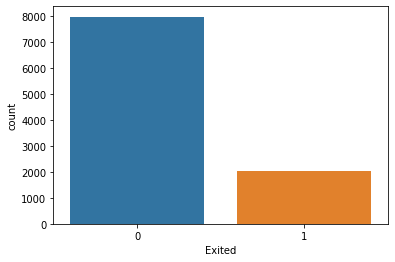

In [21]:
sns.countplot(data['Exited'])

From the above plot, we can see that '1' which is our value for customers who churned is far greater than customers who stayed '0'. That means we have an ynbalanced dataset. An unbalanced dataset is one where it's target class has uneven observation.

In [22]:
# Creating our independent and dependent variables
X = data.drop('Exited', axis=1)
y = data['Exited']

**Handling Unbalanced Dataset**

In [ ]:
# We can use two type of smapling to handdle unbalanced dataset, i.e oversampling and under sampling. We can over sample the minority class using 'replacement'. This technique is called oversampling
# The disadvantage of using undersampling is that we can loose alot of the data.

We'll Perform **OVERSAMPLING** using **SMOTE** **'SYNTETHIC MINORITY OVERSAMPLING TECHNIQUE'**

In [23]:
# We're going to make an even distribution between the majority class '0' and the minority class '1' of the target variable using SMOTE
from imblearn.over_sampling import SMOTE


In [24]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [25]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now we split our DATASET into train and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[ 0.11512293, -0.0969502 , -1.39903917, ...,  1.76042583,
        -0.46438008, -0.84852496],
       [ 1.10018981,  0.10315438, -1.39903917, ..., -0.56804438,
        -0.46438008,  1.17851572],
       [ 0.4872593 ,  2.10420013,  0.81097435, ..., -0.56804438,
        -0.46438008,  1.17851572],
       ...,
       [ 0.20268443,  0.20320667,  1.17930994, ..., -0.56804438,
        -0.46438008,  1.17851572],
       [-0.83710839,  1.30378183, -0.29403241, ..., -0.56804438,
        -0.46438008,  1.17851572],
       [ 0.53104006,  1.00362497, -1.39903917, ...,  1.76042583,
        -0.46438008,  1.17851572]])

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [43]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6229 - accuracy: 0.6798
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7645
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4993 - accuracy: 0.7768
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4838 - accuracy: 0.7790
Epoch 5/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7798
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7795
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4728 - accuracy: 0.7805
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7805
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4698 - accuracy: 0.7798
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4685 - accura

In [44]:
model.layers[0].get_weights()

[array([[-0.05754222,  0.08759644,  0.0900341 ],
        [ 1.9953421 , -0.27471322,  0.35645762],
        [-0.07010471,  0.17958054,  0.1688958 ],
        [-0.6268098 , -1.8008062 , -0.13093302],
        [-1.9049325 , -1.6883336 , -0.51040906],
        [-0.06190729,  0.43949988,  0.26868385],
        [ 0.3216585 ,  0.6919691 ,  1.4539378 ],
        [ 0.0200076 , -0.09366868,  0.06883661],
        [ 0.08507387, -1.9423202 ,  1.2070651 ],
        [-0.30119428,  0.52738845,  0.18299386],
        [-0.41649535,  0.7213537 ,  0.38687885]], dtype=float32),
 array([-0.13105579,  0.8256393 , -1.0281725 ], dtype=float32)]

In [45]:
y_log = model.predict(X_test)

In [46]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8050847457627118

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1633
           1       0.79      0.81      0.80      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



Text(69.0, 0.5, 'Truth')

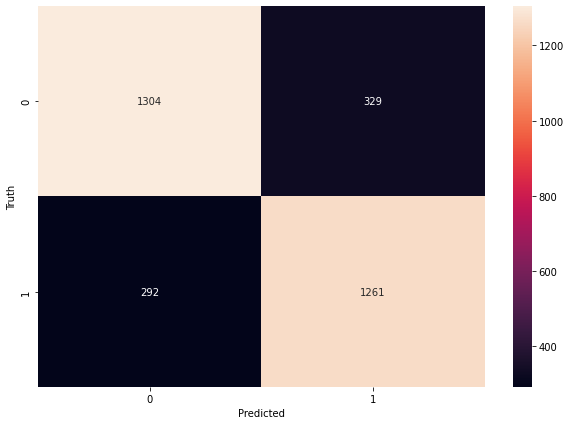

In [49]:
import matplotlib
matplotlib.use('Agg')

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [51]:
precision_score(y_test,y_pred)

0.7930817610062894

In [52]:
recall_score(y_test,y_pred)

0.8119768190598841

In [53]:
f1_score(y_test,y_pred)

0.8024180719058225

Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log = LogisticRegression()

In [56]:
log.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred1 = log.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred1)

0.7824858757062146

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
precision_score(y_test,y_pred1)

0.76875

In [62]:
recall_score(y_test,y_pred1)

0.7920154539600772

In [63]:
f1_score(y_test,y_pred1)

0.780209324452902

Support Vector Classfififer Algorithm SVC

In [64]:
from sklearn import svm

In [65]:
svm = svm.SVC()

In [66]:
svm.fit(X_train,y_train)

SVC()

In [67]:
y_pred2 = svm.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred2)

0.8367859384808537

In [69]:
precision_score(y_test,y_pred2)

0.8230143839899937

In [70]:
recall_score(y_test,y_pred2)

0.8473921442369607

In [71]:
f1_score(y_test,y_pred2)

0.8350253807106598

K NEAREST NEIGHBORS CLASSIFIER KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred3 = knn.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred3)

0.8119899560577527

In [77]:
precision_score(y_test,y_pred3)

0.791921664626683

In [78]:
recall_score(y_test,y_pred3)

0.8332260141661301

In [79]:
f1_score(y_test,y_pred3)

0.8120489488547223

Decsision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier()

In [82]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred4 = dt.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred4)

0.7790332705586943

In [85]:
precision_score(y_test,y_pred4)

0.7571168988491823

In [86]:
recall_score(y_test,y_pred4)

0.8048937540244687

In [87]:
f1_score(y_test,y_pred4)

0.780274656679151

Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier()

In [90]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
y_pred5 = rf.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred5)

0.85969868173258

In [93]:
precision_score(y_test,y_pred5)

0.8447630922693267

In [94]:
recall_score(y_test,y_pred5)

0.8725048293625242

In [95]:
f1_score(y_test,y_pred5)

0.8584098828001266

Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbc = GradientBoostingClassifier()

In [98]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [99]:
y_pred6 = gbc.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred6)

0.8427495291902072

In [101]:
precision_score(y_test,y_pred6)

0.835031847133758

In [102]:
recall_score(y_test,y_pred6)

0.8441725692208628

In [103]:
f1_score(y_test,y_pred6)

0.839577329490874

Visualizing Model Performances

ACCURACY VISUALIZATION

In [104]:
final_data=pd.DataFrame({'Models':['ANN','LR','SVC','KNN','DT','RF','GBC'],'ACC': [accuracy_score(y_test,y_pred),
                                                                                   accuracy_score(y_test,y_pred1),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                            accuracy_score(y_test,y_pred4),
                                                                            accuracy_score(y_test,y_pred5),
                                                                            accuracy_score(y_test,y_pred6)]})

In [105]:
final_data

,Models,ACC
0,ANN,0.805085
1,LR,0.782486
2,SVC,0.836786
3,KNN,0.811990
4,DT,0.779033
5,RF,0.859699
6,GBC,0.842750


In [106]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


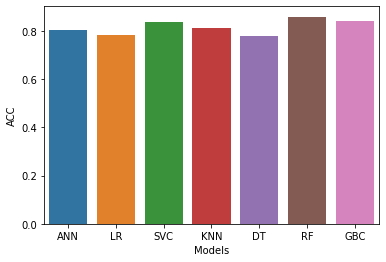

In [107]:
sns.barplot(final_data['Models'], final_data['ACC'])

PRECISION VISUALIZATION

In [108]:
final_data=pd.DataFrame({'Models':['ANN','LR','SVC','KNN','DT','RF','GBC'],'PRE': [precision_score(y_test,y_pred),
                                                                                   precision_score(y_test,y_pred1),
                                                                            precision_score(y_test,y_pred2),
                                                                            precision_score(y_test,y_pred3),
                                                                            precision_score(y_test,y_pred4),
                                                                            precision_score(y_test,y_pred5),
                                                                            precision_score(y_test,y_pred6)]})

In [132]:
final_data

,Models,F1-SCORE
0,ANN,0.802418
1,LR,0.780209
2,SVC,0.835025
3,KNN,0.812049
4,DT,0.780275
5,RF,0.858410
6,GBC,0.839577


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


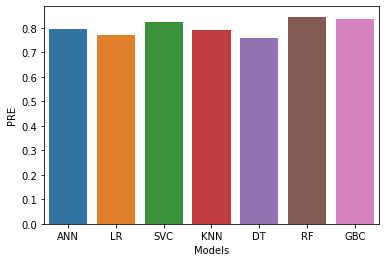

In [110]:
sns.barplot(final_data['Models'], final_data['PRE'])

RECALL VISUALIZATION

In [114]:
final_data=pd.DataFrame({'Models':['ANN','LR','SVC','KNN','DT','RF','GBC'],'RECALL': [recall_score(y_test,y_pred),
                                                                                   recall_score(y_test,y_pred1),
                                                                            recall_score(y_test,y_pred2),
                                                                            recall_score(y_test,y_pred3),
                                                                            recall_score(y_test,y_pred4),
                                                                            recall_score(y_test,y_pred5),
                                                                            recall_score(y_test,y_pred6)]})

In [115]:
final_data

,Models,RECALL
0,ANN,0.811977
1,LR,0.792015
2,SVC,0.847392
3,KNN,0.833226
4,DT,0.804894
5,RF,0.872505
6,GBC,0.844173


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


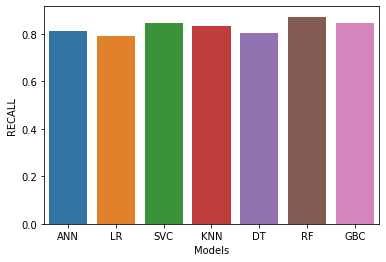

In [116]:
sns.barplot(final_data['Models'], final_data['RECALL'])

F1 VISUALIZATION

In [122]:
final_data=pd.DataFrame({'Models':['ANN','LR','SVC','KNN','DT','RF','GBC'],'F1-SCORE': [f1_score(y_test,y_pred),
                                                                                   f1_score(y_test,y_pred1),
                                                                            f1_score(y_test,y_pred2),
                                                                            f1_score(y_test,y_pred3),
                                                                            f1_score(y_test,y_pred4),
                                                                            f1_score(y_test,y_pred5),
                                                                            f1_score(y_test,y_pred6)]})

In [123]:
final_data

,Models,F1-SCORE
0,ANN,0.802418
1,LR,0.780209
2,SVC,0.835025
3,KNN,0.812049
4,DT,0.780275
5,RF,0.858410
6,GBC,0.839577


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


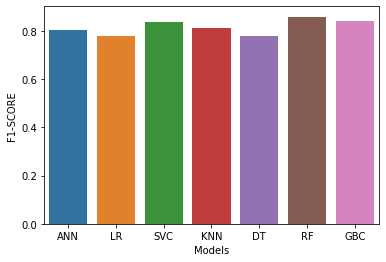

In [124]:
sns.barplot(final_data['Models'], final_data['F1-SCORE'])

From the analysis above, we can see that random forest has the best prediction accuracy.

In [ ]:
# Now we apply random forest algorithm to the entire dataset.

In [ ]:
# First we perform feature scaling on 'X_res' and 'y_res'

In [125]:
X_res = sc.fit_transform(X_res)

In [126]:
rf.fit(X_res,y_res)

RandomForestClassifier()

Save Model (Random Forest)

In [127]:
import joblib

In [128]:
joblib.dump(rf,'Churn_Prediction_Algorithm')

['Churn_Prediction_Algorithm']

In [129]:
model = joblib.load('Churn_Prediction_Algorithm')

In [130]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [131]:
model.predict([[322,56,1,0.5,1,0,1,200500.45,0,0,0]])

array([0])

**GUI**

In [ ]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e2.get())
  p3=int(e3.get())
  p4=int(e4.get())
  p5=int(e5.get())
  p6=int(e6.get())
  p7=int(e7.get())
  p8=int(e8.get())
  p9=int(e9.get())
  if p9 == 1:
    Geography_Germany = 1
    Geography_Spain = 0
    Geography_France = 0
  elif p9 == 2:
    Geography_Germany = 0
    Geography_Spain = 1
    Geography_France = 0
  elif p9 == 3:
    Geography_Germany = 0
    Geography_Spain = 0
    Geography_France = 1
  p10 = int(e10.get())

  model = joblib.load('Churn_Model')
  result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]]))

  if result == 0:
    Label(master, text = "Not Churn").grid(row=31)
  else:
    Label(master, text = "Churn").grid(row=31)


master = Tk()
master.title("Bank Customer Churn Prediction Algorithm")


label = Label(master, text = "Customers Churn Prediction Using Machine Learning",
              bg = "black", fg = "white"). \
               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure(NUM OF YEARS)").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard(1=YES,2=NO)").grid(row=6)
Label(master, text="IsActiveMember(1=YES,2=NO)").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography(1=GER,2=SPA,3=FRA)").grid(row=9)
Label(master, text="Gender (1=MALE,2=FEMALE)").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: ignored